In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/cse /Sem 5/da/project/dataset.xlsx')

In [ ]:
df.shape

(201183, 135)

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#dropping rows without summary
df = df[df.summary.notnull()]
df = df[df.latitude.notnull()]
df = df[df.longitude.notnull()]
df = df[df.nkill.notnull()]
df = df[df.propextent.notnull()]

In [ ]:
df.shape

(52660, 135)

In [ ]:
#dealing with sparse data
''' so here i deleted attributes with 50% null values
'''
#for i in df:
#  print(i,df[i].isnull().sum()/len(df)*100)
count=0
for i in df:
  if ((df[i].isnull().sum()/len(df)*100)>=50):
    print(i,df[i].isnull().sum()/len(df)*100)
    df.drop([i], axis=1, inplace=True)
    


approxdate 95.02278769464489
resolution 99.03911887580706
location 50.37030003797949
alternative 88.16748955563996
alternative_txt 88.16748955563996
attacktype2 91.64641093809342
attacktype2_txt 91.64641093809342
attacktype3 99.17584504367642
attacktype3_txt 99.17584504367642
targtype2 89.3923281428029
targtype2_txt 89.3923281428029
targsubtype2 89.67337637675655
targsubtype2_txt 89.67337637675655
corp2 90.25066464109382
target2 89.420812761109
natlty2 89.60121534371439
natlty2_txt 89.60121534371439
targtype3 98.7067983289024
targtype3_txt 98.7067983289024
targsubtype3 98.7675655146221
targsubtype3_txt 98.7675655146221
corp3 98.83782757311052
target3 98.7067983289024
natlty3 98.7352829472085
natlty3_txt 98.7352829472085
gsubname 96.72426889479681
gname2 98.0117736422332
gsubname2 99.82529434105582
gname3 99.67527535131029
gsubname3 99.99240410178504
motive 50.86403342195215
guncertain2 98.07633877706039
guncertain3 99.68287124952525
claimmode 81.08621344473984
claimmode_txt 81.08621344

In [ ]:
df.shape
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue',
       'propcomment', 'ishostkid', 'scite1', 'scite2', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,summary,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,nperps,nperpcap,claimed,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,1/1/1970: Unknown African American assailants ...,1,1,1,0,0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,Black Nationalists,0.0,0,-99.0,-99.0,0.0,5,Firearms,5.0,Unknown Gun Type,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,"""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...",Hewitt Project,-9,-9,0,-9
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1,0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,Unknown,0.0,0,-99.0,-99.0,0.0,6,Explosives,16.0,Unknown Explosive Type,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),22500.0,Three transformers were damaged.,0.0,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0,0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,0.0,0,1.0,1.0,1.0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,Firebomb consisting of gasoline,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),60000.0,"Basketball courts, weight room, swimming pool,...",0.0,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0,"1/3/1970: Karl Armstrong, a member of the New ...",1,1,1,0,0,1,0,7,Facility/Infrastructure Attack,2,Government (General),21.0,Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,217.0,United States,New Year's Gang,0.0,0,1.0,1.0,0.0,8,Incendiary,20.0,Gasoline or Alcohol,Poured gasoline on the floor and lit it with a...,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,Slight damage,0.0,Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...",Hewitt Project,0,0,0,0
11,197001060001,1970,1,6,0,217,United States,1,North America,Colorado,Denver,39.758968,-104.876305,1.0,0,1/6/1970: Unknown perpetrators threw a Molotov...,1,1,1,1,0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,Army Recruiting Station,"Army Recruiting Station, Denver Colorado",217.0,United States,Left-Wing Militants,0.0,0,-99.0,-99.0,0.0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,Molotov cocktail,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),305.0,NaN,0.0,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9


In [ ]:
df.shape


(52660, 63)

In [ ]:
#skewed data 
import numpy as np
counts = df.nunique()
print(counts)

eventid     52660
iyear          49
imonth         12
iday           32
extended        2
            ...  
dbsource       16
INT_LOG         3
INT_IDEO        3
INT_MISC        3
INT_ANY         3
Length: 63, dtype: int64


In [ ]:
#irrelevant
list1=['INT_LOG','INT_IDEO','INT_MISC','INT_ANY','dbsource','specificity','vicinity','doubtterr','weapdetail','propextent','propextent_txt','propcomment','scite1','scite2','guncertain1','suicide']
for i in list1:
  df.drop(i, axis=1, inplace=True)


In [ ]:
#duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.skew(axis = 0, skipna = True)

eventid          -2.760395
iyear            -2.759019
imonth            0.046916
iday              0.039828
extended          5.879047
country           3.798087
region           -0.459074
latitude         -0.945546
longitude        -1.264436
crit1            -9.667610
crit2           -14.558692
crit3            -3.157446
multiple          1.552352
success          -4.755786
attacktype1       1.403918
targtype1         0.362552
targsubtype1      0.284329
natlty1           3.588938
individual       14.439618
nperps           21.611219
nperpcap         -5.710544
claimed          -7.270115
weaptype1         2.905825
weapsubtype1      0.225951
nkill            46.357708
nkillus         159.334568
nkillter         61.787994
nwound          132.455547
nwoundus         75.611314
nwoundte         81.476737
property         -3.788556
propvalue       159.277163
ishostkid       -12.893744
dtype: float64

In [ ]:
highly_skewed=['propvalue','nkillus','individual','nperps','nperpcap','claimed']
for i in highly_skewed:
  df.drop(i, axis=1, inplace=True)

Corelation

Text(0.5, 1.0, 'Correlation Heatmap')

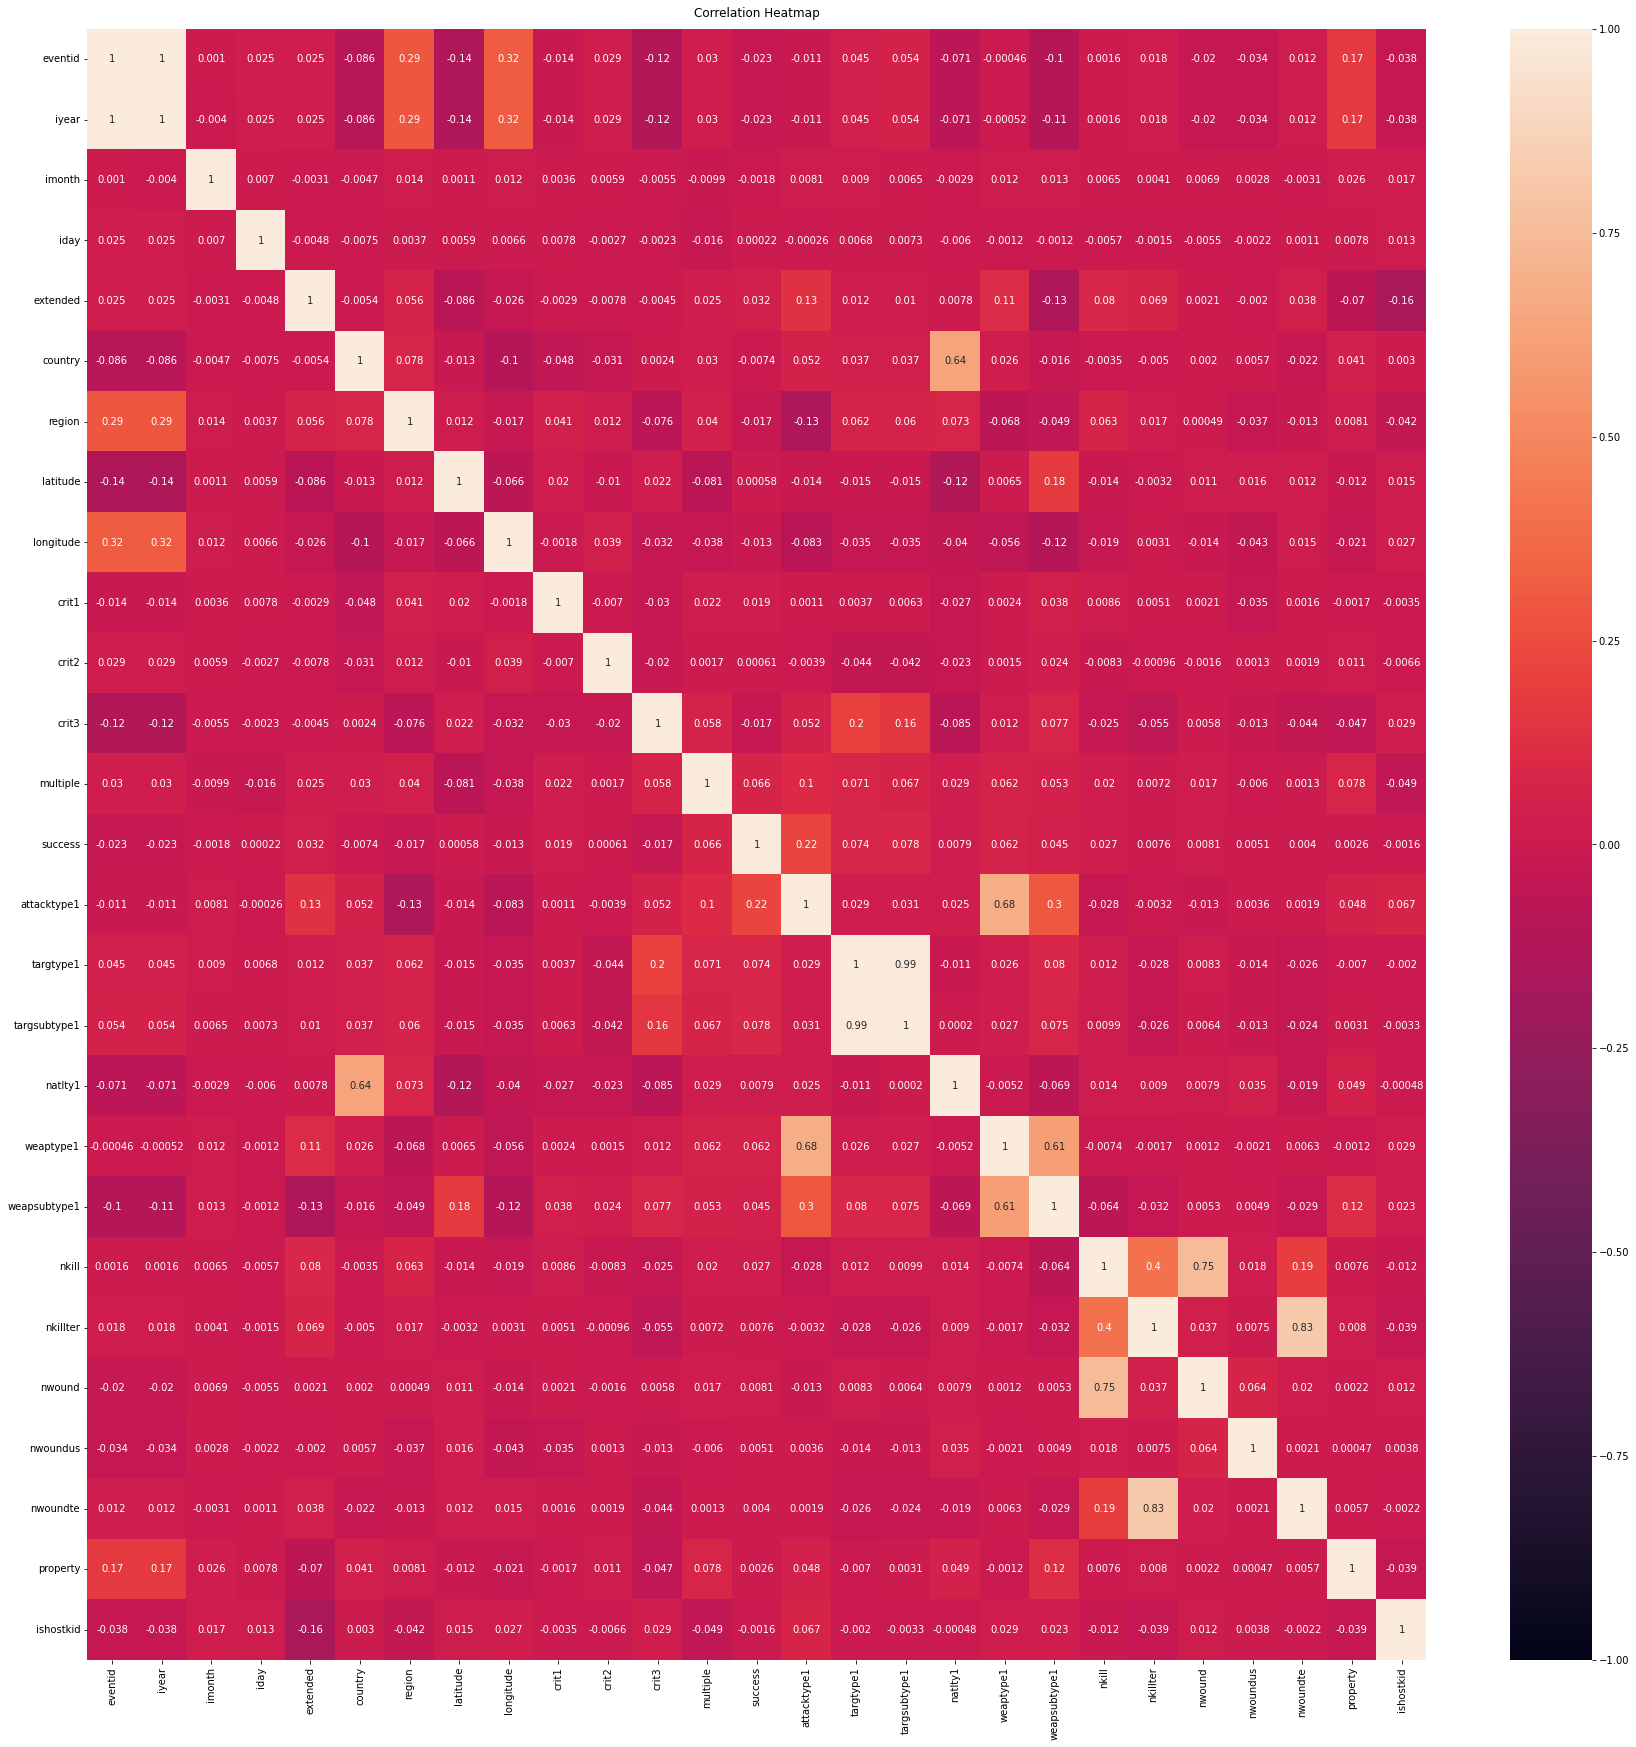

In [ ]:
plt.figure(figsize=(30, 30))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
plt.savefig('heatmap1.png')

<Figure size 432x288 with 0 Axes>

In [ ]:

df.shape

(52660, 41)

In [ ]:
for i in df:
  print(i,df[i].isnull().sum())
'''
city fillna unknown
nkill terr 0'''
df['city'].fillna('unknown',inplace=True)


eventid 0
iyear 0
imonth 0
iday 0
extended 0
country 0
country_txt 0
region 0
region_txt 0
provstate 0
city 201
latitude 0
longitude 0
summary 0
crit1 0
crit2 0
crit3 0
multiple 0
success 0
attacktype1 0
attacktype1_txt 0
targtype1 0
targtype1_txt 0
targsubtype1 1355
targsubtype1_txt 1355
corp1 6522
target1 65
natlty1 174
natlty1_txt 174
gname 0
weaptype1 0
weaptype1_txt 0
weapsubtype1 1853
weapsubtype1_txt 1853
nkill 0
nkillter 847
nwound 2285
nwoundus 275
nwoundte 1576
property 0
ishostkid 85


In [ ]:
for i in df:
  print(i,df[i].isnull().sum())
df.fillna(df.mean(), inplace=True)

eventid 0
iyear 0
imonth 0
iday 0
extended 0
country 0
country_txt 0
region 0
region_txt 0
provstate 0
city 0
latitude 0
longitude 0
summary 0
crit1 0
crit2 0
crit3 0
multiple 0
success 0
attacktype1 0
attacktype1_txt 0
targtype1 0
targtype1_txt 0
targsubtype1 1355
targsubtype1_txt 1355
corp1 6522
target1 65
natlty1 174
natlty1_txt 174
gname 0
weaptype1 0
weaptype1_txt 0
weapsubtype1 1853
weapsubtype1_txt 1853
nkill 0
nkillter 847
nwound 2285
nwoundus 275
nwoundte 1576
property 0
ishostkid 85


In [ ]:
df['targsubtype1_txt'].fillna('missing',inplace=True)

df['corp1'].fillna('missing',inplace=True)

df['target1'].fillna('missing',inplace=True)
df['natlty1_txt'].fillna('missing',inplace=True)

df['weapsubtype1_txt'].fillna('missing',inplace=True)


In [ ]:
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
summary             0
crit1               0
crit2               0
crit3               0
multiple            0
success             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
corp1               0
target1             0
natlty1             0
natlty1_txt         0
gname               0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
nkill               0
nkillter            0
nwound              0
nwoundus            0
nwoundte            0
property            0
ishostkid           0
dtype: int64

In [ ]:
df.to_excel('cleaned.xlsx')

In [ ]:
df

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,summary,crit1,crit2,crit3,multiple,success,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillter,nwound,nwoundus,nwoundte,property,ishostkid
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,1,1,1,0,1,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,Black Nationalists,5,Firearms,5.000000,Unknown Gun Type,0.0,0.0,0.0,0.0,0.0,1,0.0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,0,1,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,Unknown,6,Explosives,16.000000,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,1,0.0
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0,1,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,8,Incendiary,19.000000,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,1,0.0
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,"1/3/1970: Karl Armstrong, a member of the New ...",1,1,1,0,1,7,Facility/Infrastructure Attack,2,Government (General),21.0,Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,217.0,United States,New Year's Gang,8,Incendiary,20.000000,Gasoline or Alcohol,0.0,0.0,0.0,0.0,0.0,1,0.0
11,197001060001,1970,1,6,0,217,United States,1,North America,Colorado,Denver,39.758968,-104.876305,1/6/1970: Unknown perpetrators threw a Molotov...,1,1,1,0,1,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,Army Recruiting Station,"Army Recruiting Station, Denver Colorado",217.0,United States,Left-Wing Militants,8,Incendiary,19.000000,Molotov Cocktail/Petrol Bomb,0.0,0.0,0.0,0.0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201173,201912310023,2019,12,31,0,167,Russia,9,Eastern Europe,Ingushetia,Magas,43.180183,44.798863,12/31/2019: Assailants attacked a traffic poli...,1,1,1,0,1,2,Armed Assault,3,Police,24.0,Police Checkpoint,Traffic Police of Russia (GIBDD),Checkpoint,167.0,Russia,Caucasus Province of the Islamic State,9,Melee,23.000000,Knife or Other Sharp Object,2.0,1.0,4.0,0.0,1.0,1,0.0
201178,201912310028,2019,12,31,0,95,Iraq,10,Middle East & North Africa,Baghdad,Baghdad,33.303567,44.371771,12/31/2019: An explosive device detonated outs...,1,1,1,0,1,3,Bombing/Explosion,14,Private Citizens & Property,77.0,Laborer (General)/Occupation Identified,Not Applicable,Residence of Tribal Leader,95.0,Iraq,Unknown,6,Explosives,16.000000,Unknown Explosive Type,0.0,0.0,0.0,0.0,0.0,1,0.0
201179,201912310030,2019,12,31,0,195,Sudan,11,Sub-Saharan Africa,West Darfur,El Geneina,13.440886,22.441728,12/31/2019: Assailants attacked the police hea...,1,1,1,0,1,9,Unknown,3,Police,22.0,"Police Building (headquarters, station, school)",Sudanese Police,West Darfur Police Headquarters,195.0,Sudan,Unknown,13,Unknown,13.259157,missing,2.0,0.0,1.0,0.0,0.0,1,0.0
201180,201912310031,2019,12,31,0,195,Sudan,11,Sub-Saharan Africa,West Darfur,El Geneina,13.440886,22.441728,12/31/2019: Assailants attacked the West Darfu...,1,1,1,0,1,2,Armed Assault,2,Government (General),21.0,Government Building/Facility/Office,Government of West Darfur,West Darfu